<a href="https://colab.research.google.com/github/Denis04-M/phishing-lab/blob/main/malware_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# creating dataframe from csv file
data = pd.read_csv('/content/uci_malware_detection.csv')

# printing first 5 
data.head()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataframe size
data.shape

(373, 532)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
F_1,373.0,0.997319,0.051778,0.0,1.0,1.0,1.0,1.0
F_2,373.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
F_3,373.0,0.994638,0.073127,0.0,1.0,1.0,1.0,1.0
F_4,373.0,0.002681,0.051778,0.0,0.0,0.0,0.0,1.0
F_5,373.0,0.994638,0.073127,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
F_527,373.0,0.040214,0.196726,0.0,0.0,0.0,0.0,1.0
F_528,373.0,0.091153,0.288213,0.0,0.0,0.0,0.0,1.0
F_529,373.0,0.080429,0.272321,0.0,0.0,0.0,0.0,1.0
F_530,373.0,0.530831,0.499719,0.0,0.0,1.0,1.0,1.0


In [ ]:
# looking for duplicates

data[data.duplicated(keep=False)]

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
6,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
20,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
23,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dropping duplicate
data.drop_duplicates(keep=False, inplace=True)
data.shape

(369, 532)

In [ ]:
# number of non_malware
non_malware = data[data['Label'] == 'non-malicious']
non_malware.shape

(68, 532)

In [ ]:
# number of malware
malware = data[data['Label'] != 'non-malicious']
malware.shape

(301, 532)

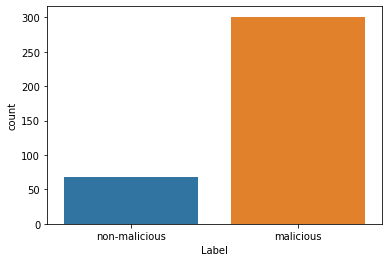

In [ ]:
# plot of number of malware and non_malware
sns.countplot(data=data, x='Label')

In [ ]:
# replacing non-malicious with 1 and malicious with 0

data['Label'] = data['Label'].map({'non-malicious': 1, 'malicious': 0})

In [ ]:
# separating features and label

# label
y = data["Label"]

# features
X = data.drop("Label", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# spliting data into training and testing set, 80% will be used for training
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(295, 531) (295,)
(74, 531) (74,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score

Creating models

In [ ]:
# 1. Logistic Regression
lr_model =  LogisticRegression(max_iter=500 ,random_state=42)

# 2. Decision Tree
dt_model =  DecisionTreeClassifier()

# 3. Naive Bayes
nb_model = GaussianNB()

# 4. Random Forest
rf_model = RandomForestClassifier( n_jobs=-1)

# 5. KNN
knn_model = KNeighborsClassifier(n_jobs=-1)


# puting the models in a list
models = [lr_model, dt_model, nb_model, rf_model, knn_model] 

print(len(models))

5


training the models

#############################LogisticRegression#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9864864864864865
0.9864864864864865


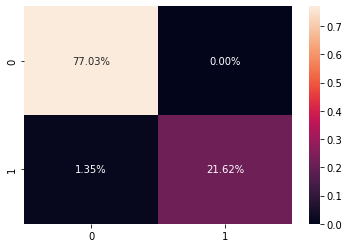

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   1.0
1.0


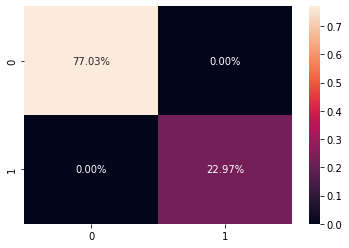

#############################GaussianNB#############################
Training Accuracy :	  1.0
Testing Accuracy :	   1.0
1.0


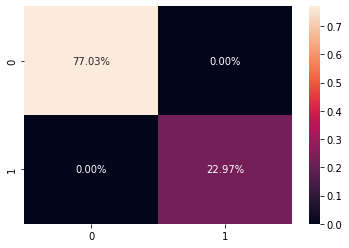

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.9864864864864865
0.9864864864864865


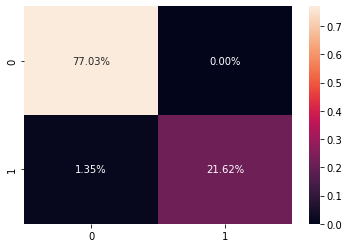

#############################KNeighborsClassifier#############################
Training Accuracy :	  0.9864406779661017
Testing Accuracy :	   0.972972972972973
0.972972972972973


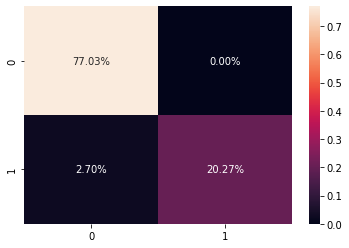

In [ ]:
for i in range(len(models)):
    # Initialising model
    print('#############################'+str(type(models[i]).__name__)+'#############################')
    #Fitting on data
    models[i].fit(X_train, y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", models[i].score(X_train, y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t  ",  models[i].score(X_test, y_test))

    y_pred = models[i].predict(X_test)
    print(accuracy_score(y_test, y_pred))

    # creating a confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    # ploting the confusion matrix
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()


ANN model

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

# adding four hidden layers with relu activation function
for i in range(4):
  ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

# adding the output layer ith sigmoid activation function
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Training the ANN on the training set
ann.fit(X_train, y_train, batch_size = 12, epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.8237
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8441
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.9695
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9966
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9966
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9966
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9966
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9966
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.9966
Epoch 11/